# Olympic Data Analysis Project

# Objective:

Analyze Olympic data to extract insights about athletes’ performance, participation trends, and anomalies in data.

Key Steps:

# Data Cleaning:

Removed duplicates and irrelevant entries.

Filled missing values intelligently (mean/median/mode or domain knowledge).

Checked for suspicious or inconsistent data.

# Outlier Analysis:

Detected outliers using statistical methods (like boxplots or IQR).

Highlighted outliers instead of removing them to maintain all real-world extremes.

Observed patterns in outliers (e.g., unusually young or old athletes, extreme medal counts, or rare sports participation).

# Data Visualization:

Visualized trends in athlete participation over the years.

Compared medal counts across countries, sports, and years.

Highlighted outliers on visualizations to draw attention to interesting anomalies.

# Insights & Observations:

Example: Countries with consistently high medal counts.

Example: Sports with unusually high participation or extreme performances.

Outliers reveal rare or exceptional cases worth exploring further.

# Tools Used:

Python (Pandas, Matplotlib, Seaborn)

Jupyter Notebook

In [1]:
import numpy as np
import pandas as pd

# taking csv data file into

In [2]:
df=pd.read_csv("athlete_events.csv")

In [3]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


# Data Info

In [4]:
# before cleaning the data we need to gather infromation about data here we going to gather information about data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


# data cleaning

# 1. check the null value and remove them for data set 

In [6]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [7]:
# as we see the Age,Height,Weight,Medal has null values we know that Age,Height,Weight are numeber but medal is not a number it is an object 

In [8]:
x=df['Age'].mean()
df.fillna({"Age":x},inplace=True)

In [9]:
h=df['Height'].mean()
df.fillna({"Height":h},inplace=True)

In [10]:
w=df['Weight'].mean()
df.fillna({"Weight":h},inplace=True)

In [11]:
# as for the Medal columne most of the  athlete dont win medalso we fill them in no medal and change them into category 

In [12]:
df['Medal']=df['Medal'].fillna("no medals")

In [13]:
df['Medal']=df['Medal'].astype("category")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   ID      271116 non-null  int64   
 1   Name    271116 non-null  object  
 2   Sex     271116 non-null  object  
 3   Age     271116 non-null  float64 
 4   Height  271116 non-null  float64 
 5   Weight  271116 non-null  float64 
 6   Team    271116 non-null  object  
 7   NOC     271116 non-null  object  
 8   Games   271116 non-null  object  
 9   Year    271116 non-null  int64   
 10  Season  271116 non-null  object  
 11  City    271116 non-null  object  
 12  Sport   271116 non-null  object  
 13  Event   271116 non-null  object  
 14  Medal   271116 non-null  category
dtypes: category(1), float64(3), int64(2), object(9)
memory usage: 29.2+ MB


In [15]:
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,80.00000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,no medals
1,2,A Lamusi,M,23.0,170.00000,60.00000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,no medals
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,175.33897,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,no medals
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,175.33897,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.00000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,no medals


#  the  null value checking part is complete so we acn go to next part  the next crucial part is to check the duplicated values exist or not if the exist then we need to remove them

# 2. Check the duplicate value and remove them

In [16]:
df.duplicated().sum()

np.int64(1385)

In [17]:
# as we see there is 1385 r duplicated rows value exist in the data set 271116-1385=269731 values are not duplicate so we need to remove 1385 duplicate data

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269731 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   ID      269731 non-null  int64   
 1   Name    269731 non-null  object  
 2   Sex     269731 non-null  object  
 3   Age     269731 non-null  float64 
 4   Height  269731 non-null  float64 
 5   Weight  269731 non-null  float64 
 6   Team    269731 non-null  object  
 7   NOC     269731 non-null  object  
 8   Games   269731 non-null  object  
 9   Year    269731 non-null  int64   
 10  Season  269731 non-null  object  
 11  City    269731 non-null  object  
 12  Sport   269731 non-null  object  
 13  Event   269731 non-null  object  
 14  Medal   269731 non-null  category
dtypes: category(1), float64(3), int64(2), object(9)
memory usage: 31.1+ MB


In [20]:
# as we see ther only 269731 row exist we remove 1385 rows from the dat set

In [21]:
df.describe()

,ID,Age,Height,Weight,Year
count,269731.000000,269731.000000,269731.000000,269731.000000,269731.000000
mean,68264.949591,25.458303,175.338957,94.570049,1978.623073
std,39026.253843,6.056530,9.301313,45.680963,29.752055
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34655.500000,22.000000,170.000000,63.000000,1960.000000
50%,68233.000000,25.000000,175.338970,75.000000,1988.000000
75%,102111.000000,28.000000,180.000000,100.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [22]:
print(df['Sport'].value_counts().head())

Sport
Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10827
Name: count, dtype: int64


In [23]:
38624+26707+23195+11448+10827

110801

In [24]:
print(df['NOC'].value_counts().head())

NOC
USA    18604
FRA    12551
GBR    12115
ITA    10668
GER     9734
Name: count, dtype: int64


In [25]:
18604+12551+12115+10668+9734

63672

#the Sport and NOC dose not seem to be a problem but the height ,weight and age might bu outlier  
#look  at age the minimum age is 10 that possible but may not be realiestic for Olympic
#Max = 97 years (definitely suspicious – maybe a data error or some non-competing participant)
# Height

#Min = 127 cm, Max = 226 cm (plausible, but 226 cm is extremely tall → rare).

# Weight

#Min = 25 kg (too low for adult athletes, might be missing/incorrect).

#Max = 214 kg (possible for weightlifting, but worth checking outliers).


In [26]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [27]:
df[df['Age']<12][['Name','Age', 'Year', 'Sport']]

,Name,Age,Year,Sport
43468,Magdalena Cecilia Colledge,11.0,1932,Figure Skating
73461,Carlos Bienvenido Front Barrera,11.0,1992,Rowing
79024,Luigina Giavotti,11.0,1928,Gymnastics
94058,"Sonja Henie (-Topping, -Gardiner, -Onstad)",11.0,1924,Figure Skating
101378,Beatrice Hutiu,11.0,1968,Figure Skating
102916,Etsuko Inada,11.0,1936,Figure Skating
140650,Liu Luyang,11.0,1988,Figure Skating
142882,Dimitrios Loundras,10.0,1896,Gymnastics
152798,Marcelle Matthews,11.0,1960,Figure Skating
237141,Megan Olwen Devenish Taylor (-Mandeville-Ellis),11.0,1932,Figure Skating


In [28]:
269731-269678 

53

In [29]:
df[df['Age'] > 90][['Name','Age','Year','Sport']]

,Name,Age,Year,Sport
98118,Winslow Homer,96.0,1932,Art Competitions
257054,John Quincy Adams Ward,97.0,1928,Art Competitions


# as we see the wilsow Homer who participate at olymic in 1932  is not 96 years old but 72 years old s so we can see that These art competition rows are unreliable if you’re analyzing athletes’ ages, heights, or weights. for the  worst cae we need to roemove the  art competition from our analysis but there is onlu two rwos so we just  set ther age,year,sports as NaN

In [30]:
# Names with wrong data
wrong_names = ["Winslow Homer", "John Quincy Adams Ward"]

# Set Age, Year, Sport to NaN
df.loc[df['Name'].isin(wrong_names), ['Age','Year','Sport']] = None

# Optional: mark them as problematic
df['DataIssue'] = df['Name'].isin(wrong_names)


# Outlier Analysis

In [31]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'DataIssue'],
      dtype='object')

In [32]:
numeric_col=['Age', 'Height', 'Weight']


In [33]:
df[numeric_col].describe()

,Age,Height,Weight
count,269729.000000,269731.000000,269731.000000
mean,25.457776,175.338957,94.570049
std,6.053462,9.301313,45.680963
min,10.000000,127.000000,25.000000
25%,22.000000,170.000000,63.000000
50%,25.000000,175.338970,75.000000
75%,28.000000,180.000000,100.000000
max,88.000000,226.000000,214.000000


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

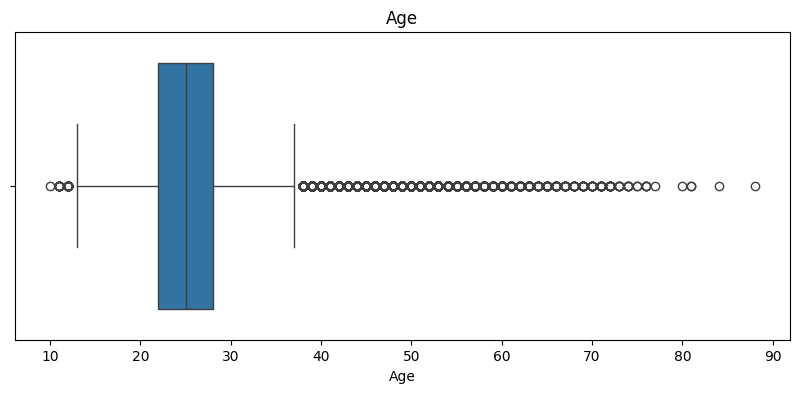

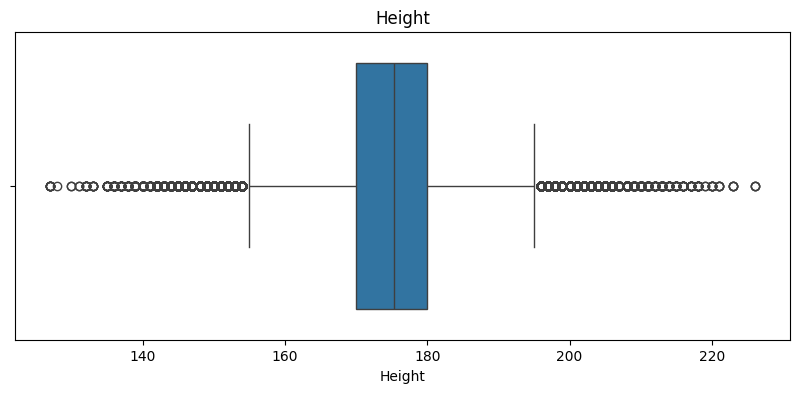

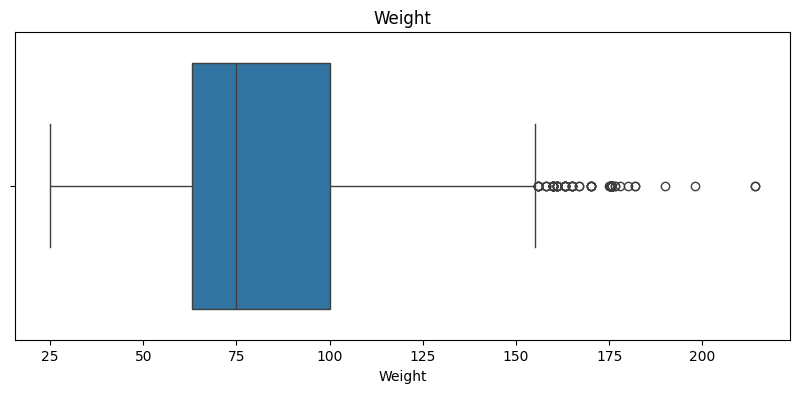

In [35]:
for col in numeric_col:
    plt.figure(figsize=(10,4))
    sns.boxplot(data=df,x=col)
    plt.title(f"{col}")
    plt.show()

# as we see the Age and Height has more outlier then  Weight so  we do outlier analying in those 3  we use IQR method to detect the outliers and after Detecting we romve them

In [36]:
# IQR
q1=df[numeric_col].quantile(0.25)
q3=df[numeric_col].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
print("IQR:-")
print(iqr)
print("lower_bound:-")
print(lower_bound)
print("upper_bound:-")
print(upper_bound)

IQR:-
Age        6.0
Height    10.0
Weight    37.0
dtype: float64
lower_bound:-
Age        13.0
Height    155.0
Weight      7.5
dtype: float64
upper_bound:-
Age        37.0
Height    195.0
Weight    155.5
dtype: float64


In [37]:
outliers=df[((df[numeric_col]<lower_bound)|(df[numeric_col]>upper_bound)).any(axis=1)]

# inseted of removimg them we highlight them  the reason is we are doing Data Analysing project not Machine Learning project so Highlight them is good for story telling and EDA

In [38]:
outliers.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'DataIssue'],
      dtype='object')

In [39]:
outliers['Sport'].value_counts().head()

Sport
Gymnastics    11225
Athletics      7225
Shooting       5981
Swimming       5284
Fencing        4549
Name: count, dtype: int64

# lets Highlight them in VisualiZation

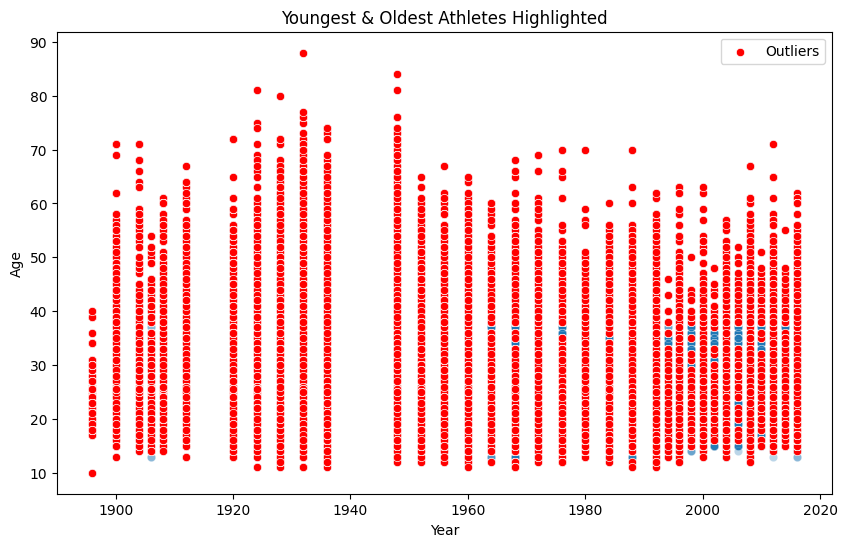

In [40]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Year', y='Age', alpha=0.3)
sns.scatterplot(data=outliers, x='Year', y='Age', color='red', label='Outliers')
plt.title("Youngest & Oldest Athletes Highlighted")
plt.legend()
plt.show()


as we see the youngest person who participate in  Olympic is 10 years and the oldest person who participate in Olympic is close to 90 years 

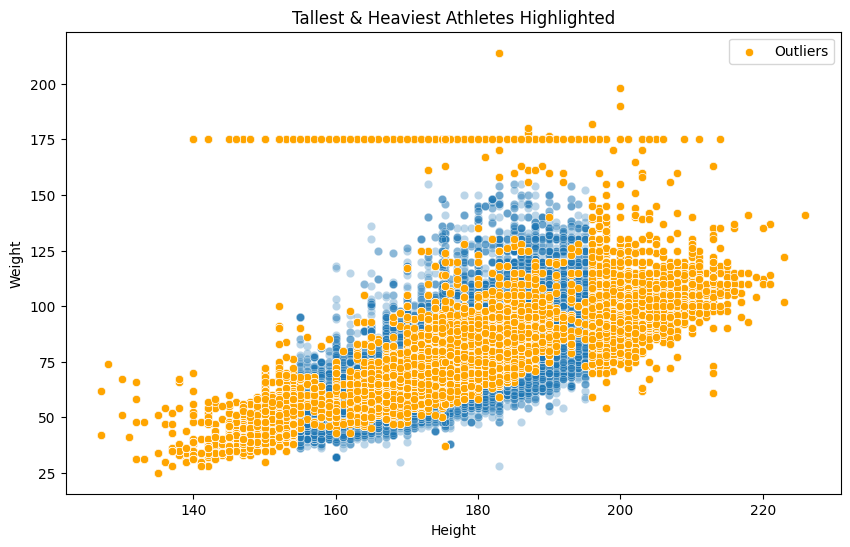

In [41]:
# highlighting  Height vs Weight
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Height', y='Weight', alpha=0.3)
sns.scatterplot(data=outliers, x='Height', y='Weight', color='orange', label='Outliers')
plt.title("Tallest & Heaviest Athletes Highlighted")
plt.legend()
plt.show()


In [42]:
print("Youngest Olympians:")
print(outliers.nsmallest(5,'Age')[['Name','Age','Year','Sport']])

print("\nOldest Olympians:")
print(outliers.nlargest(5,'Age')[['Name','Age','Year','Sport']])

print("\nTallest Athletes:")
print(outliers.nlargest(5,'Height')[['Name','Height','Year','Sport']])

print("\nHeaviest Athletes:")
print(outliers.nlargest(5,'Weight')[['Name','Weight','Year','Sport']])



Youngest Olympians:
                                              Name   Age    Year  \
142882                          Dimitrios Loundras  10.0  1896.0   
43468                   Magdalena Cecilia Colledge  11.0  1932.0   
73461              Carlos Bienvenido Front Barrera  11.0  1992.0   
79024                             Luigina Giavotti  11.0  1928.0   
94058   Sonja Henie (-Topping, -Gardiner, -Onstad)  11.0  1924.0   

                 Sport  
142882      Gymnastics  
43468   Figure Skating  
73461           Rowing  
79024       Gymnastics  
94058   Figure Skating  

Oldest Olympians:
                              Name   Age    Year             Sport
60861   Thomas Cowperthwait Eakins  88.0  1932.0  Art Competitions
9371         George Denholm Armour  84.0  1948.0  Art Competitions
154855        Robert Tait McKenzie  81.0  1948.0  Art Competitions
236912                Louis Tauzin  81.0  1924.0  Art Competitions
138812              Max Liebermann  80.0  1928.0  Art Competitions


Most athletes are 20–30 years old, but Dimitrios Loundras (10 yrs) in 1896 and Oscar Swahn (72 yrs) in 1920 stand out as age outliers.

Basketball produced the tallest athletes (220 cm), while gymnastics produced some of the shortest (140 cm).

The heaviest Olympians were in weightlifting, crossing 200 kg.

# Export your cleaned dataset from Python:

In [43]:
df.to_csv("olympic_cleaned.csv", index=False)
